# Convolutional Neural Networks (CNN)

going from a binary classification problem with no special relationships to a multi-class classification problem with special relationships

## Multiclass Classification with Neural Networks


### a. Binary Classification

For binary classification problems (deciding between two different classes), we have a **final layer** with a single node and a **sigmoid activation**

**Sigmoid Activation** is desirable because it:

- Gives an output strictly between 0 and 1


- That value can be interpreted as a probability (which one is more lilkely and by how much)


- Has a *nice* derivative (easy to find the gradient as well as easy to be used in backpropagation)


- is analogous to logistic regression

### b. Multiclassification 

We can use **one hot encoding for categories**

- take a vector with length **equal to** the number of categories (one vector has 1 value for each category


- Represent each category with one (1) at a particular position and zero (0) everywhere else

$$ \begin{bmatrix} 1 \\ 0\\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1\\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 0\\ 1 \end{bmatrix} $$

$$ \text{Cat1, Cat2, Cat3} $$

Therefore, for multiclass classification problems, let the **final layer** be a vector with length equal to the number of possible classes.

#### Extenstion of Sigmoid to Multiclass using the Softmax function

which is the exponential of the outcome of a particular class divided by the sum of the exponentilas of the outcomes for all classes

$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{k=1}^{K} e^{z_k}} $$

This yields a vector with entries that are **between 0 and 1, and sum to 1** so we can get the probabilities of each one of the individual classes

## Loss Function for Multiclass Classification

is going to be **Categorical Cross Entropy** (similar to the log-loss function)

$$ \text{Categorical Cross Entropy} = - \sum_{i=1}^{n} y_i \log(\hat{y}_i) $$

#### Derivative of the Cross Entropy

will have a nice property when used with softmax

$$ \frac{\partial \text{C.E.}}{\partial \text{softmax}} \frac{\partial \text{softmax}}{\partial z_i} = \hat{y}_i - y_i $$

## Scaling Inputs

The formula for the gradient used to update the values of our weights, $W$ is:

$$ \frac{\partial J}{\partial W^(i)} = (\hat{y} - y) a^{i)} $$

**At each iteration** of gradient descent

$$ W_{\text{new}} = W_{\text{old}} - \text{learning rate} \times \text{derivative} $$

When $i=0$ we are using the input values X as part of the derivative to update $W_{\text{new}}$ (first layer)

Therefore, if we do not **normalize the weights**, i.e. they are on differnt scales, those with higher values are going to update much more quickly than those with lower values.

This imbalance can greatly slow down the speed at which our model converges

## Ways to Scale Inputs

### Linear Scaling to the Interval [0,1] - MinMax Scaling

$$ x_i = \frac{x_i - x_{\text{min}}} {x_{\text{max}} - x_{\text{min}}} $$

### Linear Scaling to the Interval [-1, 1]

$$ x_i = 2 \Big( \frac{x_i - x_{\text{min}}} {x_{\text{max}} - x_{\text{min}}} \Big) - 1 $$

# CNN for Image Recognition

So for, the structure of the NN we have seen treats all input interchangeably. 

For an image, each one of the different pixels will have a different numerical value to give us the density within RGB or greyscale. Therefore there will be some sort of relationship between the different pixels which are going to be each one of our different features.

The NN so far do not give us **any special relationship between these individual features** but just spit out an **ordered set of variables**.

What we want, is to incorporate domain knowledge into the architecture of a Neural Network (how images are actually built)

**Convolutional Neural Networks** were built around dealing with image data (however, the are being applied to other field as well)

## Structures in Image Data

The variables in this case are pixels

- **Topology** of pixels, i.e. spatial component (natural topology)



- **Translation Invariance** it does not matter what orientation the translation returns



- **Issues of Lighting and Contrast** to address the pixel densities changing due to lighting and contrast



- **Knowledge of the Human Visual System** has receptive fields which respond to horizontal bars, vertical bars, etx. and pieces them together



- **Pixels tend to have similar values** witin data, many of the pixels, features, will have many similar values, which will not add too much information on their own



- **Edges and Shapes** witin these imagess we are also going to want to be able to identify edges and shapes that exist within the data



- **Scale Invariance** we need to ensure that the data is scale invariant, i.e. it will classify an object as that category no matter the size of that object

Fully connected image network would require a vast number of parameters, therefore we introduce a **bias** by structuring the network to look for certain kinds of patterns

### Layers Learning Intermediate Features

certain layers can learn intermediate features. (Features need to be builtd up). We can start off with edges which then build up into shapes which them build into relation between different shapes and it can also lead to textures

# Kernels

In order to capture this relationship between our different features (pixels) we are going to use Kernels which are ar **grid of weight overlaid on a certain portion of an image, centered around a single pixel**.

Once the kernel is overalid on that portion of the image:


- each weight from the kernel is going to be **multiplied** by the pixel (number) beneath it


- The output over the centered pixel is:

$$ \text{Convolutional Operation} = \sum_{p=1}^{P} W_p \text{pixel}_p $$

This method of using kernels is what allows us to capture the relationships of nearby pixels to detect:

- Blurred portioins of the image


- Sharp portions


- Edge detection


- Emboss

## 3x3 Kernel

Given values for a 3x3 image

<div>
    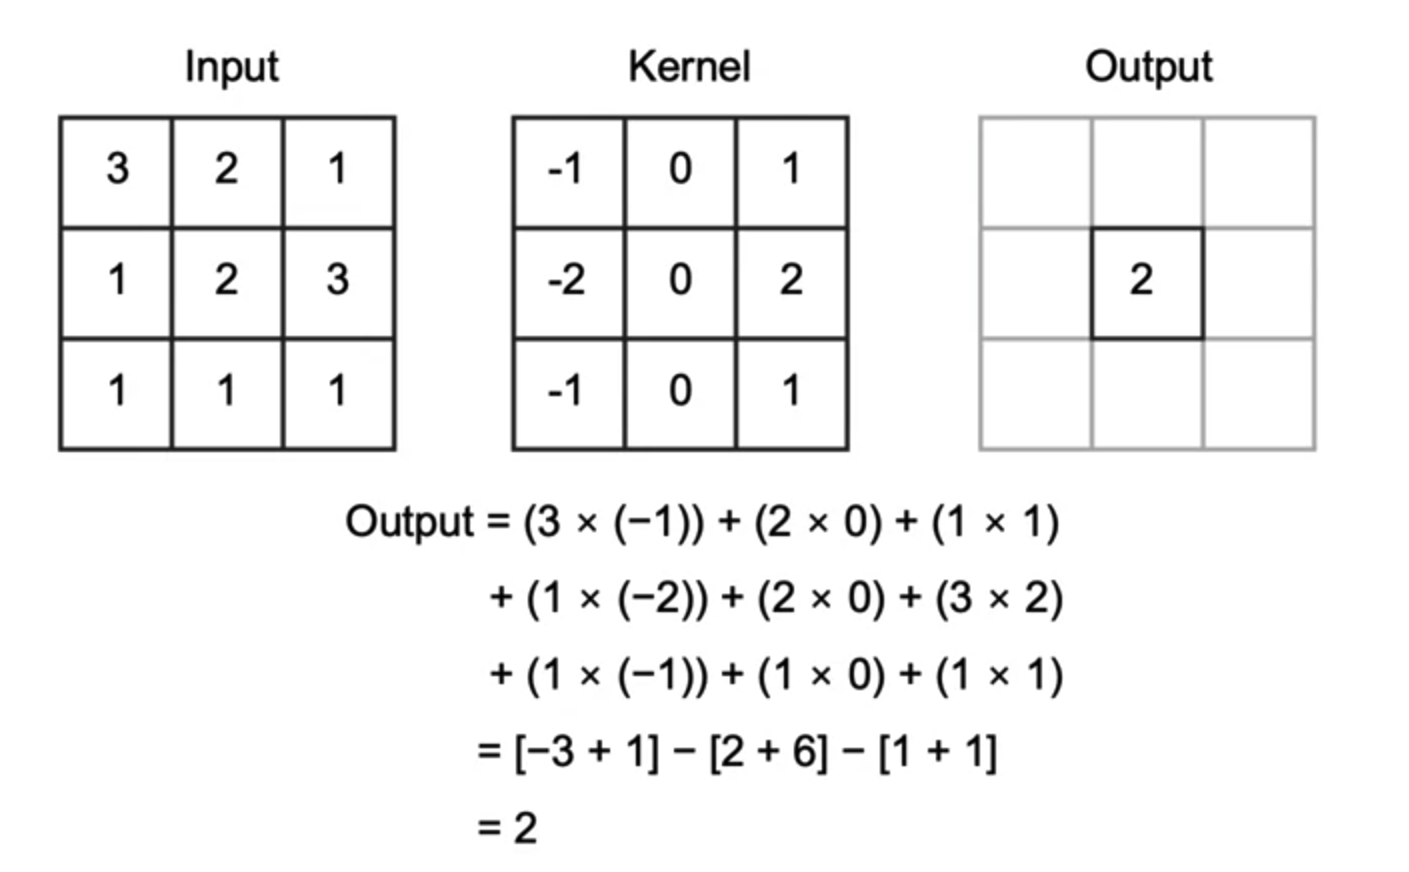
</div>

We slide over the kernel one over to the right, or one cell down etc. for every single space 

## Kernels as Feature Detectors

as you move the kernel filter along the vertical or horizontal edge, run the convolution and get the output, we end up highlighting the existence of a vertical/horizontal or corner line

<div>
    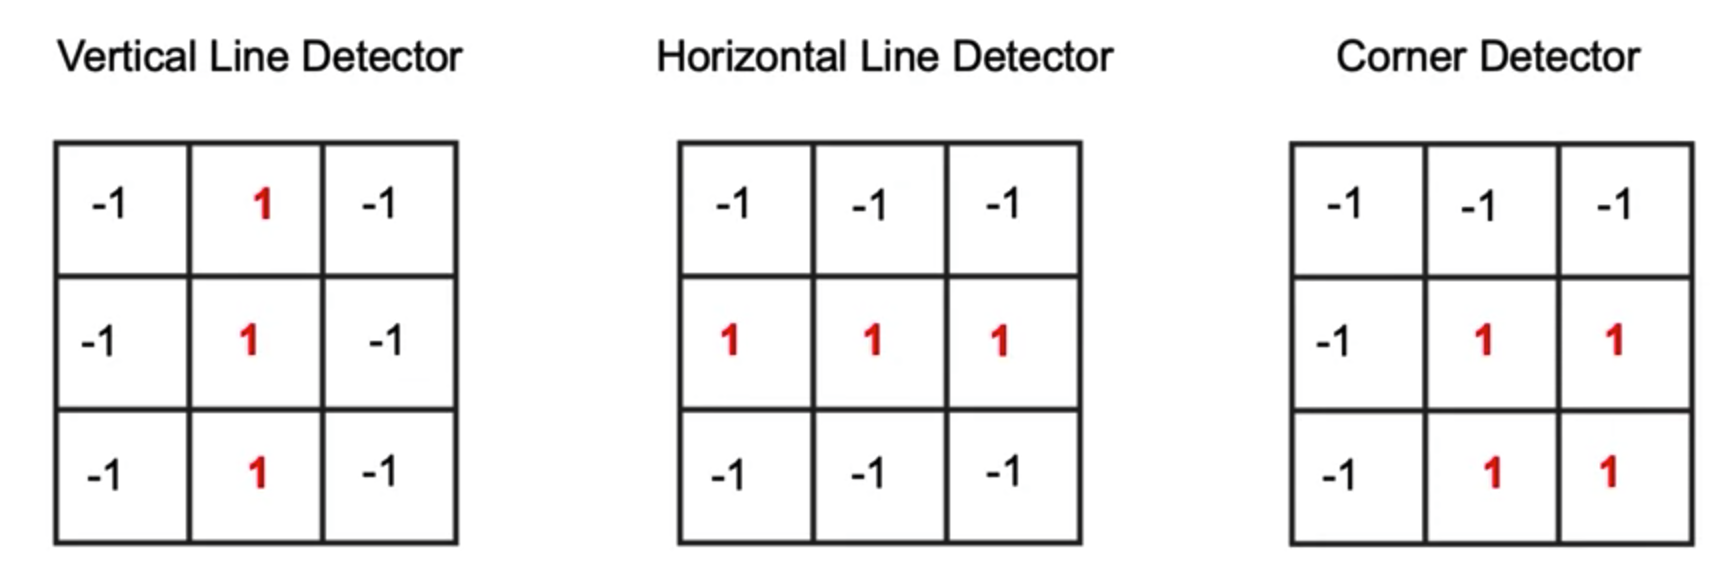
</div>

each one of these different kernels will be able to detect edges, whether they are vertical, horizontal, diagonal, corners or other combinations of features that may be important

## Idea Behind Convolutional Neural Networks

The network will find the most usefult kernels for us.

- Set up our framework so that we will learn many different kernels, i.e. use the same set of kernels across the entire image (translation invariance)



- Compared to the fully connected architecture, this will reduce the number of paramters and variance (from a bias-variance point of view)

## Colored Images

<div>
    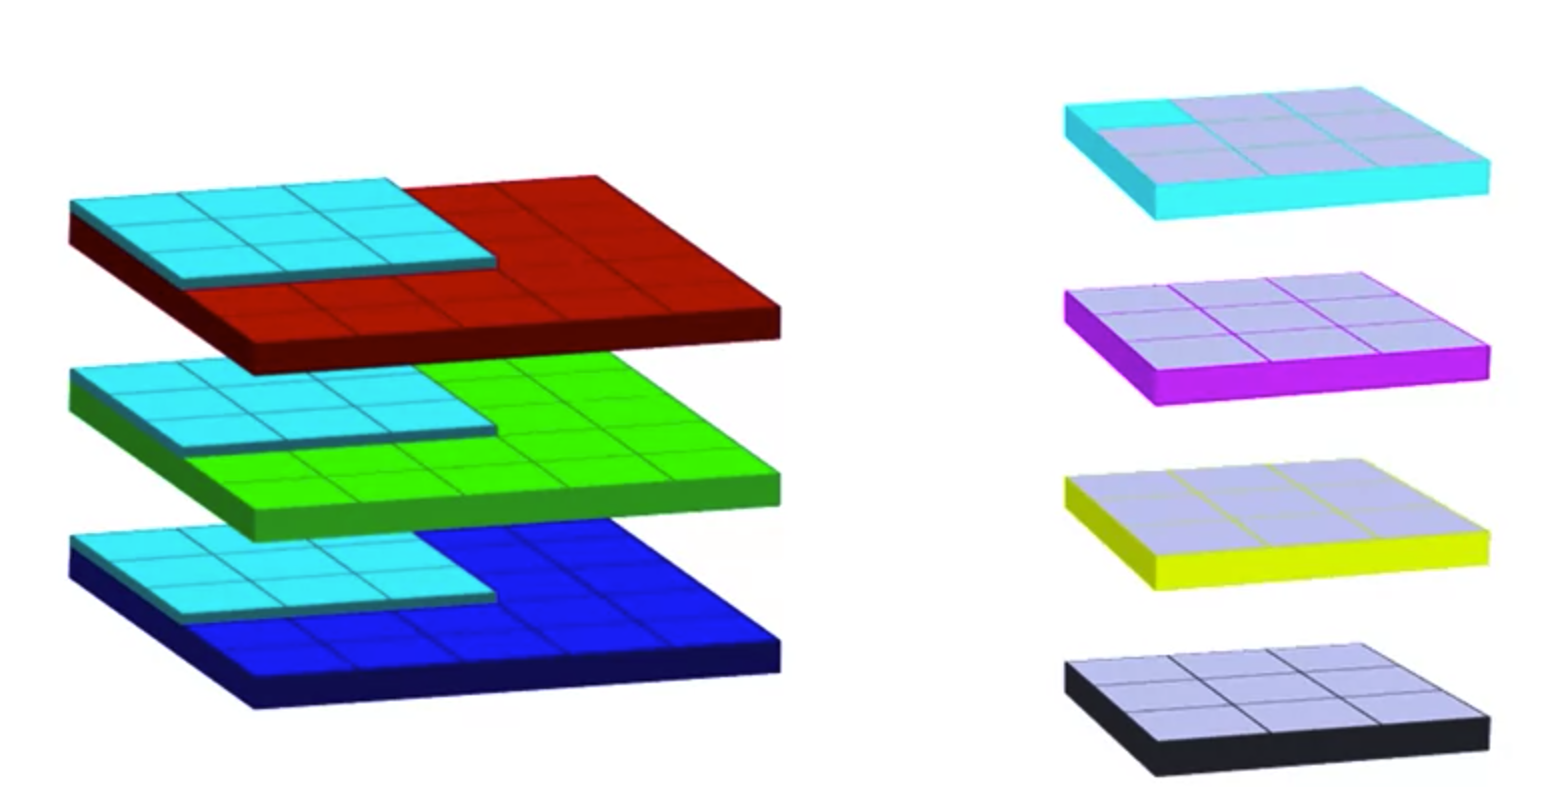
</div>

There will be, generally speaking, three two-dimensial arrays (RGB), all stacked on top of each other.

To move our kernels to three-dimensions rather than using the convolution operation using just this kernel that is 3x3, we are going to use convolutions on a filter (filters are a term we use once we move up to three-dimensions) like e.g. 3x3x3 (adding together 27 different multiplications in order to get that one output)

Once the filter is used, we will go back to haveing two-dimensions rather than three-dimensions

# Convolutional Settings - Grid Size

The **grid size (height and width)** is going to be a way of specifying the number of pixels a kernel sees at once

- typically we are going to use **odd numbers** so that there is a *center* pixel (not necessary when moving kernel across the image)


- kernel does not need to be square (generally it is but it is not necessary)

<div>
    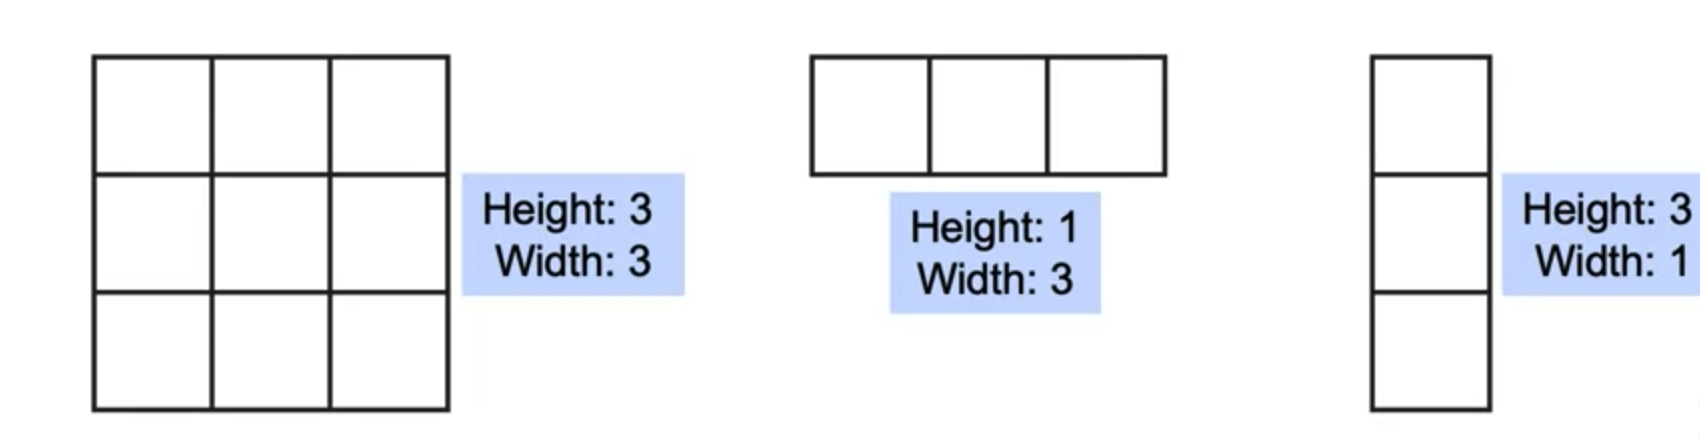
</div>

## Padding

by using kernels directly, there will be an **edge effect**, i.e. as we move our kernel across our image, it is possible that we do not put as much weight along each one of the edges (the corners of our images will not have as much play in allowing us to identify what that object is.


- Pixels near the edge will **not be used as center pixels** since there are not enough surrounding pixels (as there is no overaly with other pixels)



- **Padding** adds extra pixels around the frame, so pixels from the original image become center pixels as the kernel moves across the image


- The added pixels are typically going to be of value zero (zero-padding)

**No Padding:**

<div>
    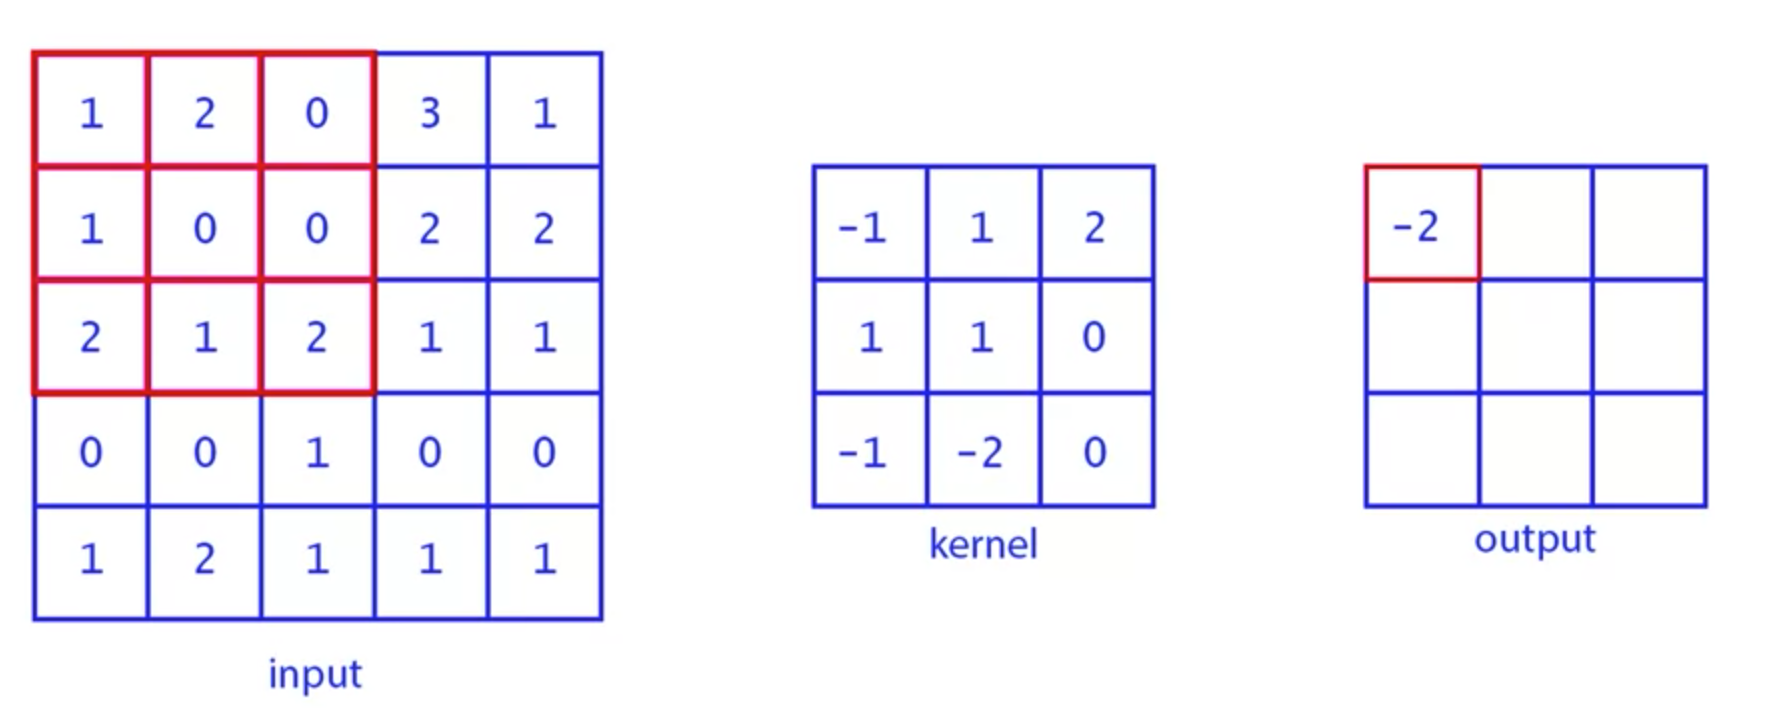
</div>

**With Padding:**

<div>
    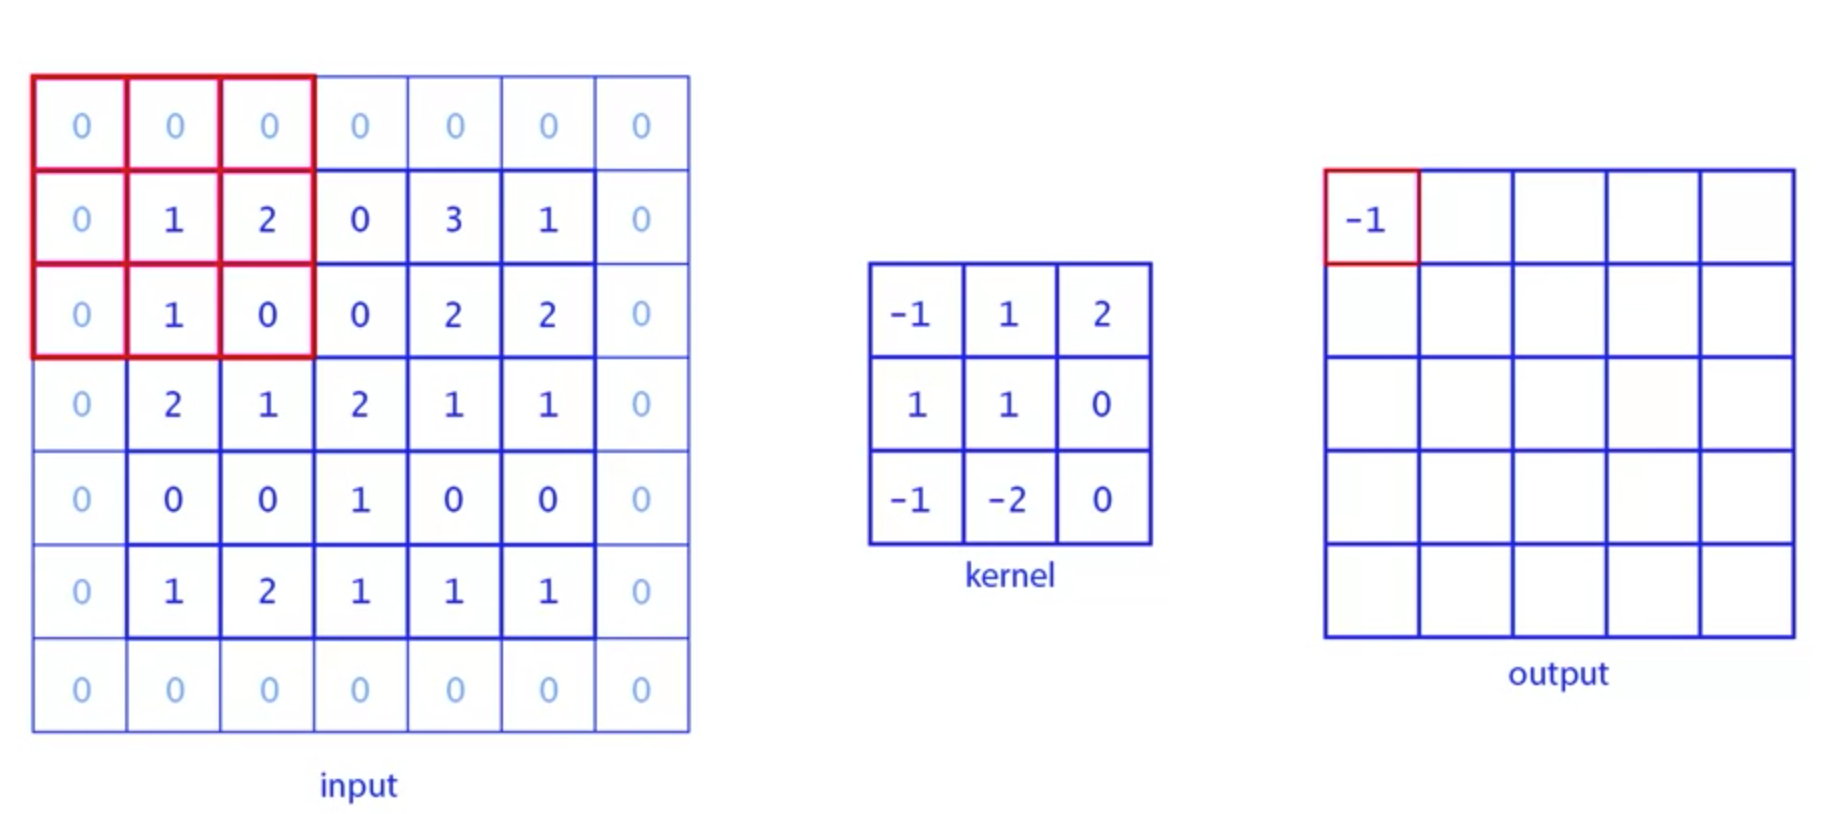
</div>

## Stride

is the *step size* as the kernel moves across the image (default is one at a time, meaning that the square will just move over one to right etc. until the end, then one cell down and go to the left and repeat)

- Can be different for vertical and horizontal steps (but usually is the same value, by default)


- when the **stride is greater than 1**, it scales down the output dimension (as we are doing less convolutional operations)

**Stride of 2 - no Padding:**

<div>
    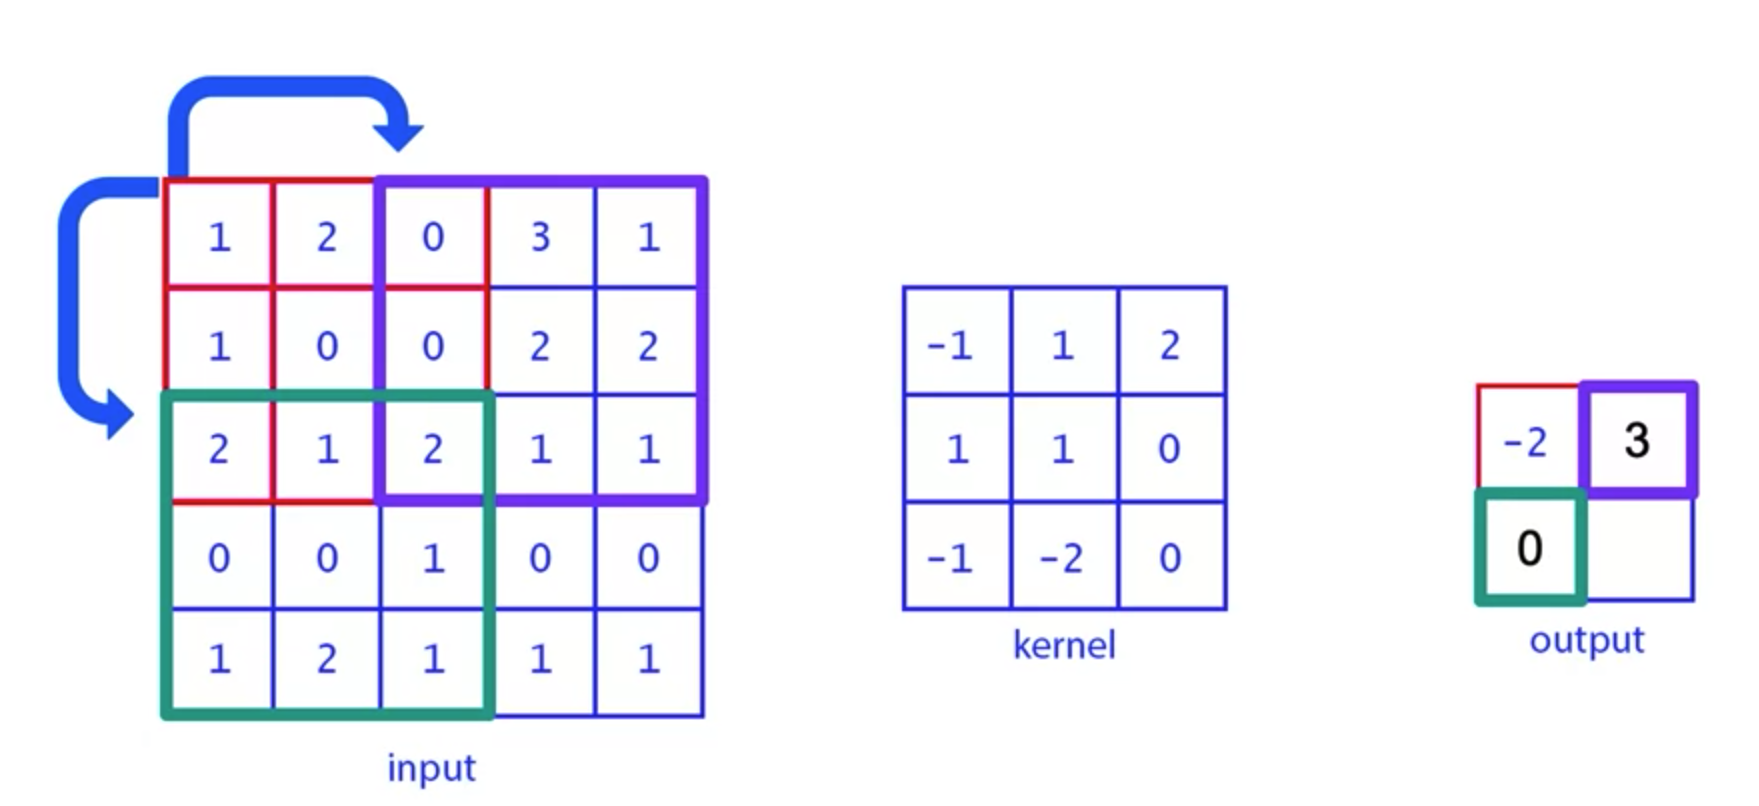
</div>

**Stride of 2 - with Padding:**

<div>
    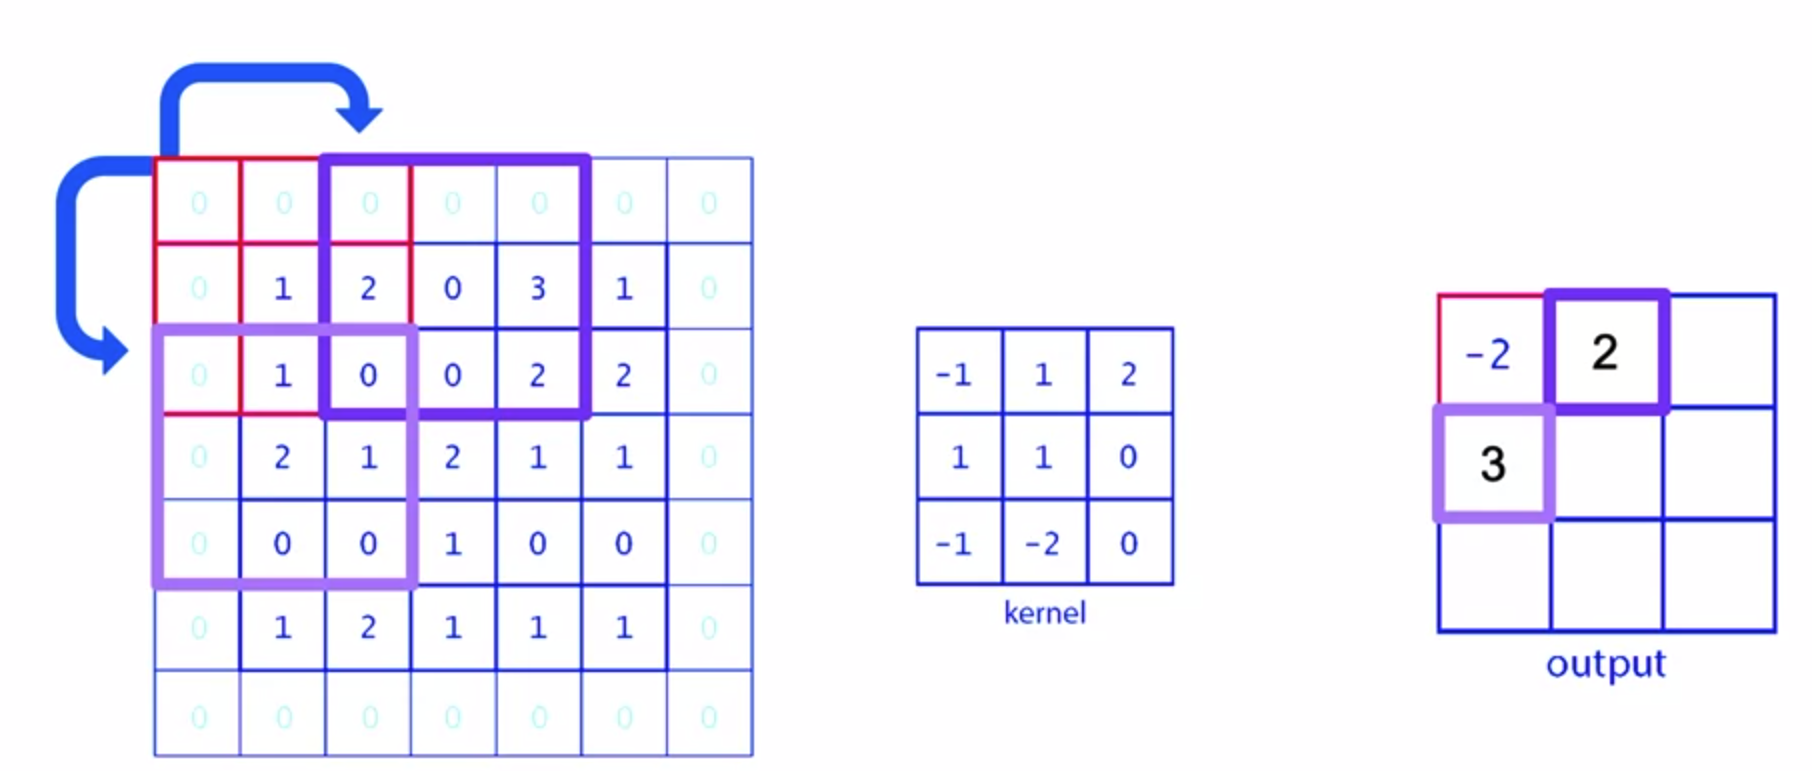
</div>

# Convolutional Settings - Depth

#### Channels

In images, we often have multiple numbers associated with eact pixel location, these different numbers, in the same location, are called channels.

- RGB Image: 3 channels (for displaying images digitally)


- CMYK (Cyan, magenta, yellow adn black): 4 channels (for printing images)


#### Depth

the number of channels we have within our image is referred to as the **depth** of that input image.

The filter itself, or the kernel, will have a depth the same size as the number of input channels


**e.g** 5x5 kernel on RGB


- there will be $5 \times 5 \times 3 = 75$ weights

The output from the layer will also have depth:

- the network typically trains many different kernels (each kernel will go over the entire image and even though we are working with three-dimensions here with our kernel, it will still output a single number)


- each kernel outputs a single number at each pixel location


- if we have 10 kernels in a layer, the output of that layer will have depth = 10 (dont want to be confined with a single kernel that can only detect one pattern)


- the number of filter we have will be the number of next layer

<div>
    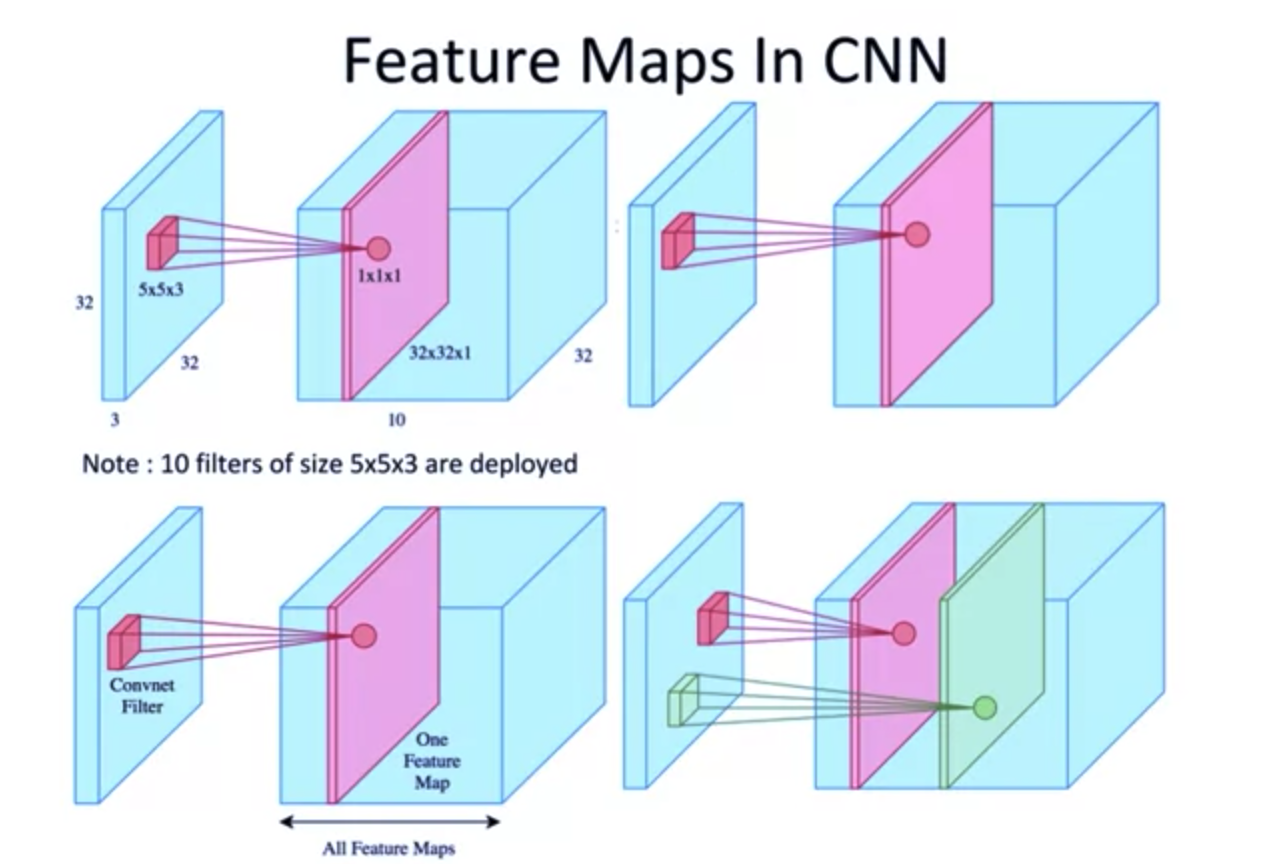
</div>

## Pooling

The idea is to **reduce the image size by mapping a patch of pixels to a single value**


- Shrinks the dimensions of the image


- Does not have any parameters, althought there are different types of pooling operations (but usally they will be operations like max, average, where we are going to take whatever values are outputted and take the maximum value or average value

### a. Max-Pooling

for each one of our distinct patches, that poolilng will represent the maximum for that patch.

<div>
    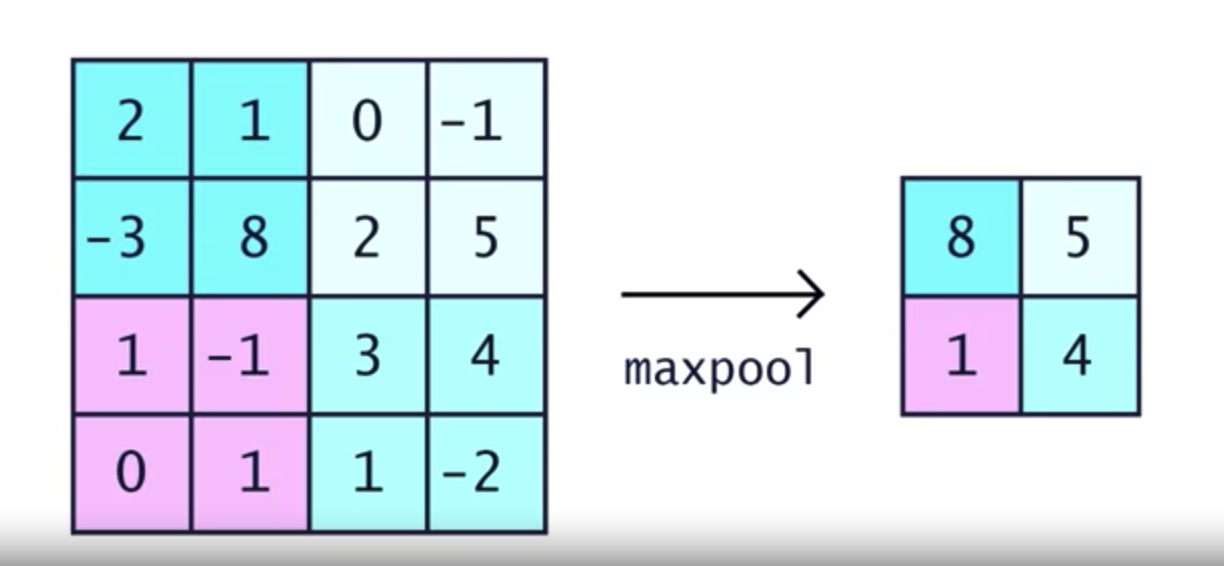
</div>

### b. Average-Pooling

For each distinct patch we get the average

<div>
    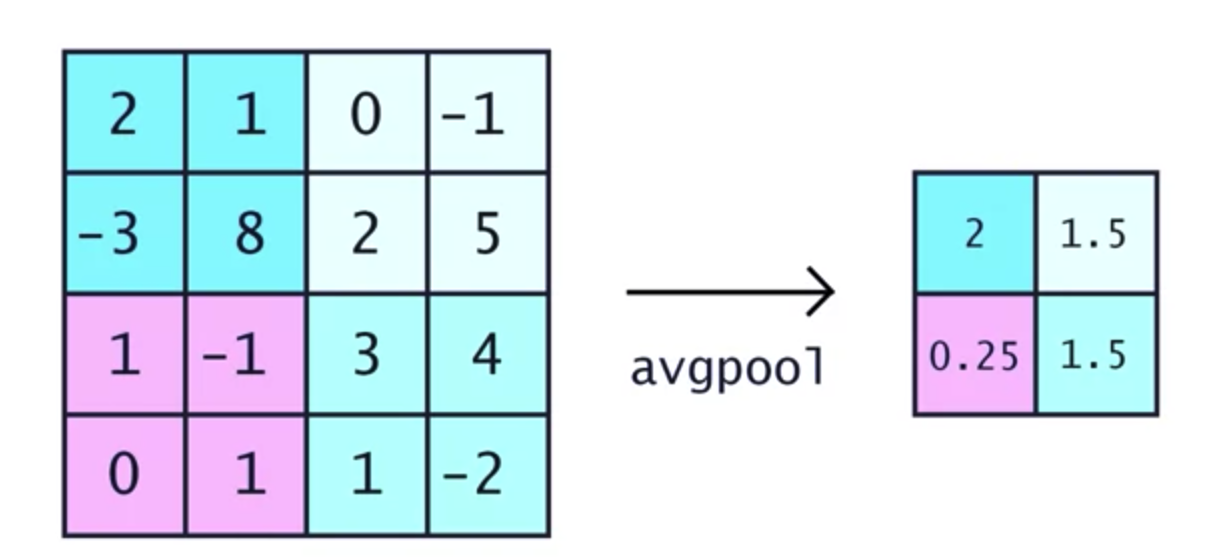
</div>

## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [9]:
# import keras
import tensorflow.keras as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 87s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


(number of rows/samples, height, width, depth)

In [4]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


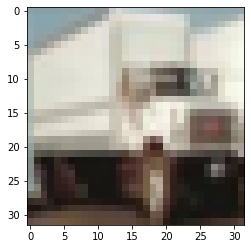

In [7]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

One-hot encoding with Keras

In [10]:
num_classes = 10

y_train = tf.utils.to_categorical(y_train, num_classes)
y_test = tf.utils.to_categorical(y_test, num_classes)

In [11]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
# As before, let's make everything float and scale so all values are between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.



- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters,
                                  kernel_size,
                                  strides=(1, 1),
                                  padding='valid',
                                  data_format=None,
                                  dilation_rate=(1, 1),
                                  activation=None,
                                  use_bias=True,
                                  kernel_initializer='glorot_uniform',
                                  bias_initializer='zeros',
                                  kernel_regularizer=None,
                                  bias_regularizer=None,
                                  activity_regularizer=None,
                                  kernel_constraint=None,
                                  bias_constraint=None,
                                  **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.


- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used



- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`



- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.



- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [13]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu')) # to ensure non-linearity

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten()) # one-dim object
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

2021-10-04 16:15:29.589408: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-04 16:15:29.592425: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

We still have 181K parameters, even though this is a "small" model.


In [15]:
batch_size = 32

# initiate RMSprop optimizer
opt = tf.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 33s 666us/sample - loss: 1.7493 - accuracy: 0.3614 - val_loss: 1.4522 - val_accuracy: 0.4793
Epoch 2/15
50000/50000 [==============================] - 34s 675us/sample - loss: 1.4726 - accuracy: 0.4672 - val_loss: 1.3368 - val_accuracy: 0.5253
Epoch 3/15
50000/50000 [==============================] - 31s 623us/sample - loss: 1.3635 - accuracy: 0.5110 - val_loss: 1.2701 - val_accuracy: 0.5533
Epoch 4/15
50000/50000 [==============================] - 36s 717us/sample - loss: 1.2887 - accuracy: 0.5409 - val_loss: 1.1633 - val_accuracy: 0.5895
Epoch 5/15
50000/50000 [==============================] - 29s 574us/sample - loss: 1.2279 - accuracy: 0.5625 - val_loss: 1.1421 - val_accuracy: 0.5931
Epoch 6/15
50000/50000 [==============================] - 33s 657us/sample - loss: 1.1899 - accuracy: 0.5772 - val_loss: 1.0964 - val_accuracy: 0.6173
Epoch 7/15
50000/50000 [====================

Prediction

In [16]:
model_1.predict_classes(x_test)

array([3, 1, 8, ..., 5, 1, 7])

Accuracy

In [17]:
import numpy as np
# need to take the inverse since y_test is a one hot encoded version of the data (where is the max arguments)
np.argmax(y_test, axis=1) 

from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test, axis=1), model_1.predict_classes(x_test))

0.6387

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.



2. How many parameters does your model have?  How does that compare to the previous model?




3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

In [18]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [19]:
## Check number of parameters

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [20]:
# initiate RMSprop optimizer
opt_2 = tf.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [21]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 186s 4ms/sample - loss: 1.5614 - accuracy: 0.4333 - val_loss: 1.2341 - val_accuracy: 0.5624
Epoch 2/5
50000/50000 [==============================] - 195s 4ms/sample - loss: 1.1770 - accuracy: 0.5855 - val_loss: 1.2037 - val_accuracy: 0.5730
Epoch 3/5
50000/50000 [==============================] - 175s 4ms/sample - loss: 1.0189 - accuracy: 0.6441 - val_loss: 0.9537 - val_accuracy: 0.6697
Epoch 4/5
50000/50000 [==============================] - 195s 4ms/sample - loss: 0.9222 - accuracy: 0.6767 - val_loss: 0.9839 - val_accuracy: 0.6660
Epoch 5/5
50000/50000 [==============================] - 189s 4ms/sample - loss: 0.8675 - accuracy: 0.7018 - val_loss: 0.7849 - val_accuracy: 0.7309
